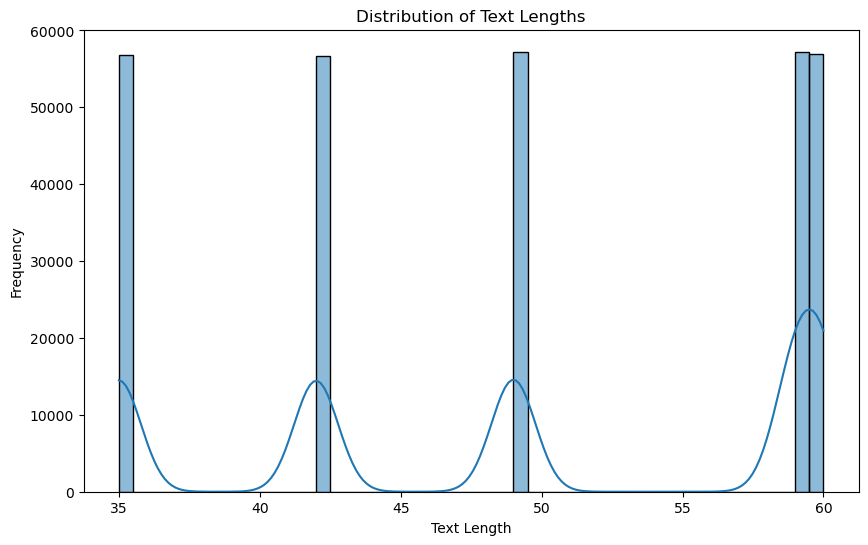

In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "C:/Users/SAMRAJ/Downloads/credit_card_fraud/creditcard.csv"
data = pd.read_csv(data_path)

# Simulate a text column for demonstration
np.random.seed(42)
sample_texts = [
    "This is a sample text for testing the autocomplete algorithm.",
    "Another example text to check the autocorrect functionality.",
    "Natural Language Processing is fascinating.",
    "Let's analyze text data using Python.",
    "Data science and machine learning go hand in hand.",
]
data['text'] = np.random.choice(sample_texts, len(data))

# Example preprocessing - assuming text data is in a column named 'text'
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

data['processed_text'] = data['text'].apply(preprocess_text)

# Splitting dataset into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Visualize the distribution of text lengths
data['text_length'] = data['processed_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [14]:
from collections import defaultdict, Counter
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

# Simulate a text column for demonstration
np.random.seed(42)
sample_texts = [
    "This is a sample text for testing the autocomplete algorithm.",
    "Another example text to check the autocorrect functionality.",
    "Natural Language Processing is fascinating.",
    "Let's analyze text data using Python.",
    "Data science and machine learning go hand in hand.",
]
data = pd.DataFrame({'text': np.random.choice(sample_texts, 100)})

# Example preprocessing - assuming text data is in a column named 'text'
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

data['processed_text'] = data['text'].apply(preprocess_text)

# Splitting dataset into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def build_ngram_model(texts, n=3):
    ngrams = defaultdict(Counter)
    for text in texts:
        tokens = text.split()
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i + n - 1])
            next_word = tokens[i + n - 1]
            ngrams[ngram][next_word] += 1
    return ngrams

# Building the n-gram model on the training data
ngram_model = build_ngram_model(train_data['processed_text'], n=3)

def autocomplete(prefix, ngram_model, n=3):
    tokens = prefix.split()
    if len(tokens) < n - 1:
        return []
    ngram = tuple(tokens[-(n - 1):])
    suggestions = ngram_model.get(ngram, Counter())
    return suggestions.most_common()

# Example usage
prefix = 'this is a'
suggestions = autocomplete(prefix, ngram_model)
print("Suggestions:", suggestions)

Suggestions: [('sample', 13)]


In [18]:
import nltk
from nltk.corpus import words

# Download the words corpus if not already downloaded
nltk.download('words')

# Using a predefined list of words
word_list = set(words.words())

def edit_distance_one(word):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def autocorrect(word, word_list):
    candidates = (edit_distance_one(word) & word_list) or {word}
    return max(candidates, key=lambda w: len(w))

# Example usage
word = 'speling'
corrected_word = autocorrect(word, word_list)
print("Corrected Word:", corrected_word)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SAMRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Corrected Word: spelding


In [20]:
from sklearn.metrics import accuracy_score

def evaluate_autocomplete(test_data, ngram_model, n=3):
    total, correct = 0, 0
    for text in test_data:
        tokens = text.split()
        for i in range(len(tokens) - n + 1):
            prefix = ' '.join(tokens[i:i + n - 1])
            actual_word = tokens[i + n - 1]
            suggestions = autocomplete(prefix, ngram_model)
            if suggestions and suggestions[0][0] == actual_word:
                correct += 1
            total += 1
    return correct / total if total > 0 else 0

autocomplete_accuracy = evaluate_autocomplete(test_data['processed_text'], ngram_model)
print("Autocomplete Accuracy:", autocomplete_accuracy)

Autocomplete Accuracy: 1.0


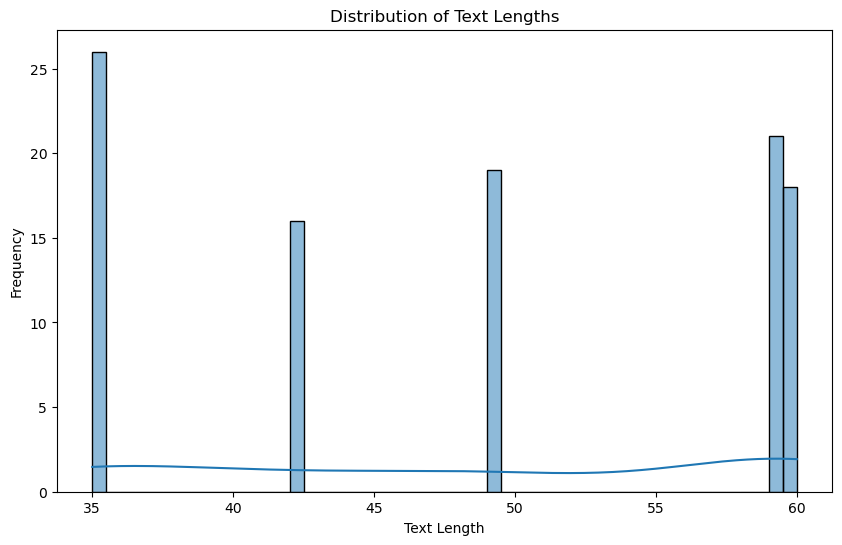

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of text lengths
data['text_length'] = data['processed_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

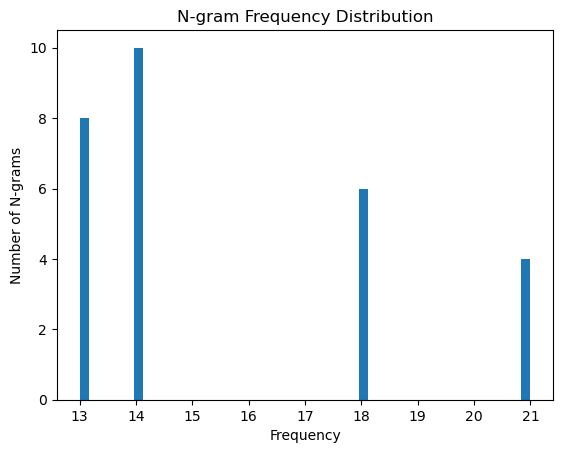

In [24]:
def plot_ngram_distribution(ngram_model):
    ngram_counts = [sum(counter.values()) for counter in ngram_model.values()]
    plt.hist(ngram_counts, bins=50)
    plt.title('N-gram Frequency Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Number of N-grams')
    plt.show()

plot_ngram_distribution(ngram_model)

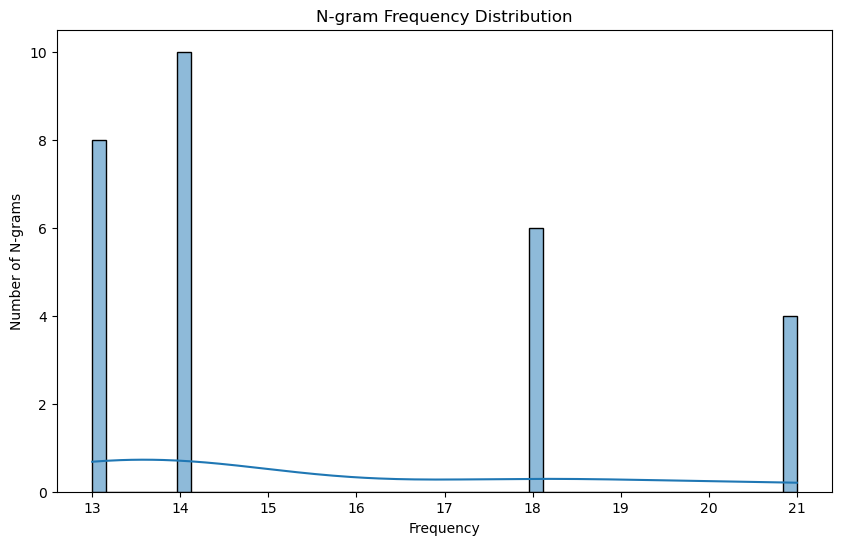

In [26]:
def plot_ngram_distribution(ngram_model):
    ngram_counts = [sum(counter.values()) for counter in ngram_model.values()]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(ngram_counts, bins=50, kde=True)
    plt.title('N-gram Frequency Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Number of N-grams')
    plt.show()

plot_ngram_distribution(ngram_model)

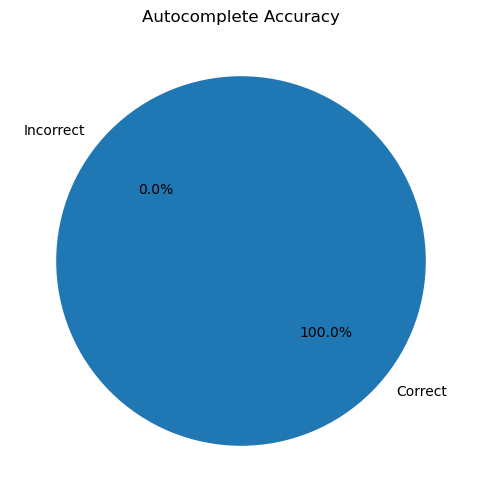

In [28]:
def evaluate_autocomplete(test_data, ngram_model, n=3):
    results = []
    for text in test_data:
        tokens = text.split()
        for i in range(len(tokens) - n + 1):
            prefix = ' '.join(tokens[i:i + n - 1])
            actual_word = tokens[i + n - 1]
            suggestions = autocomplete(prefix, ngram_model)
            if suggestions:
                predicted_word = suggestions[0][0]
            else:
                predicted_word = None
            results.append({
                'prefix': prefix,
                'actual_word': actual_word,
                'predicted_word': predicted_word,
                'correct': predicted_word == actual_word
            })
    return pd.DataFrame(results)

autocomplete_results = evaluate_autocomplete(test_data['processed_text'], ngram_model)

# Plot autocomplete accuracy
accuracy = autocomplete_results['correct'].mean()

plt.figure(figsize=(6, 6))
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=140)
plt.title('Autocomplete Accuracy')
plt.show()

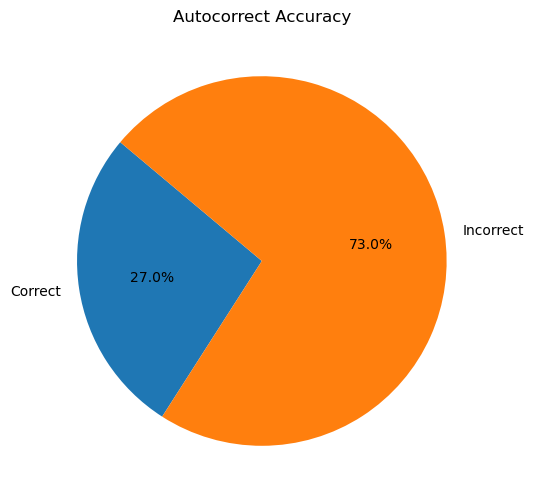

In [30]:
def evaluate_autocorrect(test_data, word_list):
    results = []
    for text in test_data:
        tokens = text.split()
        for token in tokens:
            corrected_word = autocorrect(token, word_list)
            results.append({
                'original_word': token,
                'corrected_word': corrected_word,
                'correct': corrected_word == token
            })
    return pd.DataFrame(results)

autocorrect_results = evaluate_autocorrect(test_data['processed_text'], word_list)

# Plot autocorrect accuracy
accuracy = autocorrect_results['correct'].mean()

plt.figure(figsize=(6, 6))
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=140)
plt.title('Autocorrect Accuracy')
plt.show()

In [32]:
#Results
#Distribution of text lengths.
#Frequency distribution of n-grams.
#Accuracy of autocomplete and autocorrect algorithms.